In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigm(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a * (1 - a)

In [3]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost    

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


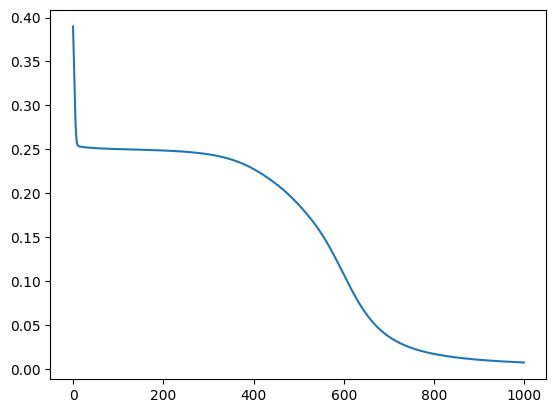

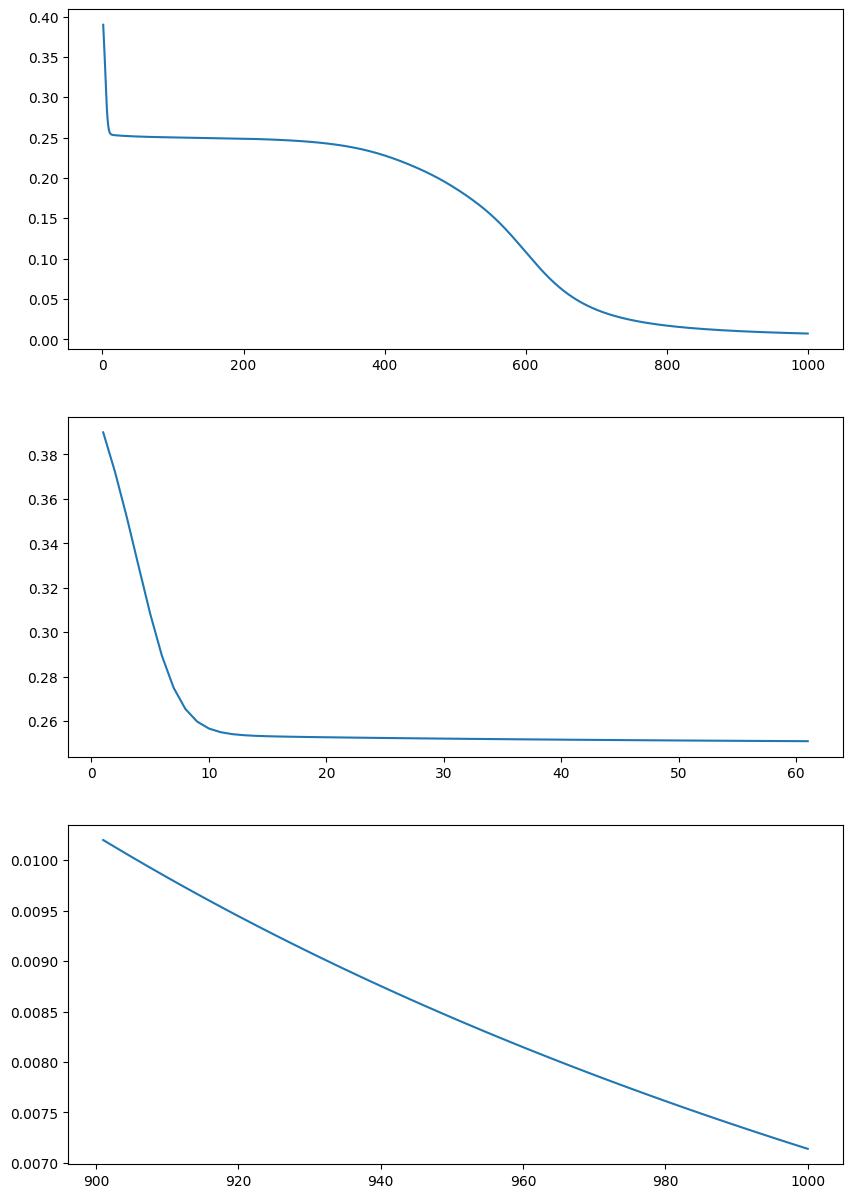

In [4]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])

Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [5]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurons
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n 
        self.o = o
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n, m)
        self.b2 = np.random.randn(n, 1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o, n)
        self.b3 = np.random.randn(o, 1)
        
    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):       
            # if these are not reshaped to size (m,1) and (o,1) respectively, they will be of shape
            # (m,) and (o,), which can cause problems.
            x = x.reshape(-1, 1)
            y = y.reshape(-1, 1)
            
            a1 = x          # convert input vector x into (m,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (m,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3) # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta, xs, ys):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
    
    def predict(self, x):
        x = x.reshape(self.m, 1)
        a3 = self.feedforward(x)
        
        # Get the index of the maximum probability as the predicted class
        prediction = np.argmax(a3) # Add 1 because classes start from 1
        return prediction

In [6]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941]
 [ 0.94863382  0.70167179 -1.05108156]
 [-0.36754812 -1.13745969 -1.32214752]
 [ 1.77225828 -0.34745899  0.67014016]] 
 W3 = 
 [[ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941  0.94863382]
 [ 0.70167179 -1.05108156 -0.36754812 -1.13745969]
 [-1.32214752  1.77225828 -0.34745899  0.67014016]
 [ 0.32227152  0.06034293 -1.04345    -1.00994188]
 [ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 
W3 = 
 [[ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827]
 [-2.50623032  0.14696049  0.60619549 -0.02253889  0.01342226  0.93594489]
 [ 0.42062266  0.41161964 -0.07132392 -0.04543758  1.04088597 -0.09403473]] 



### Testing with 2 input neurons, 2 hidden neurons and 1 output neuron

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


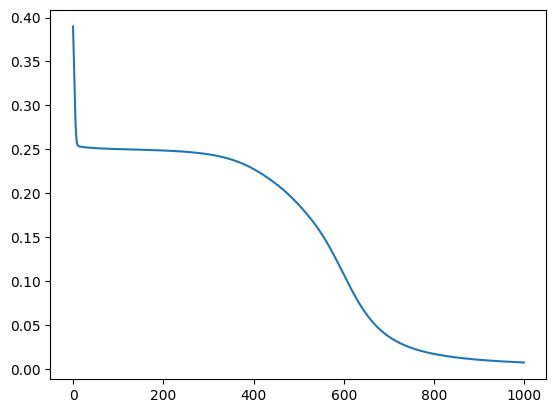

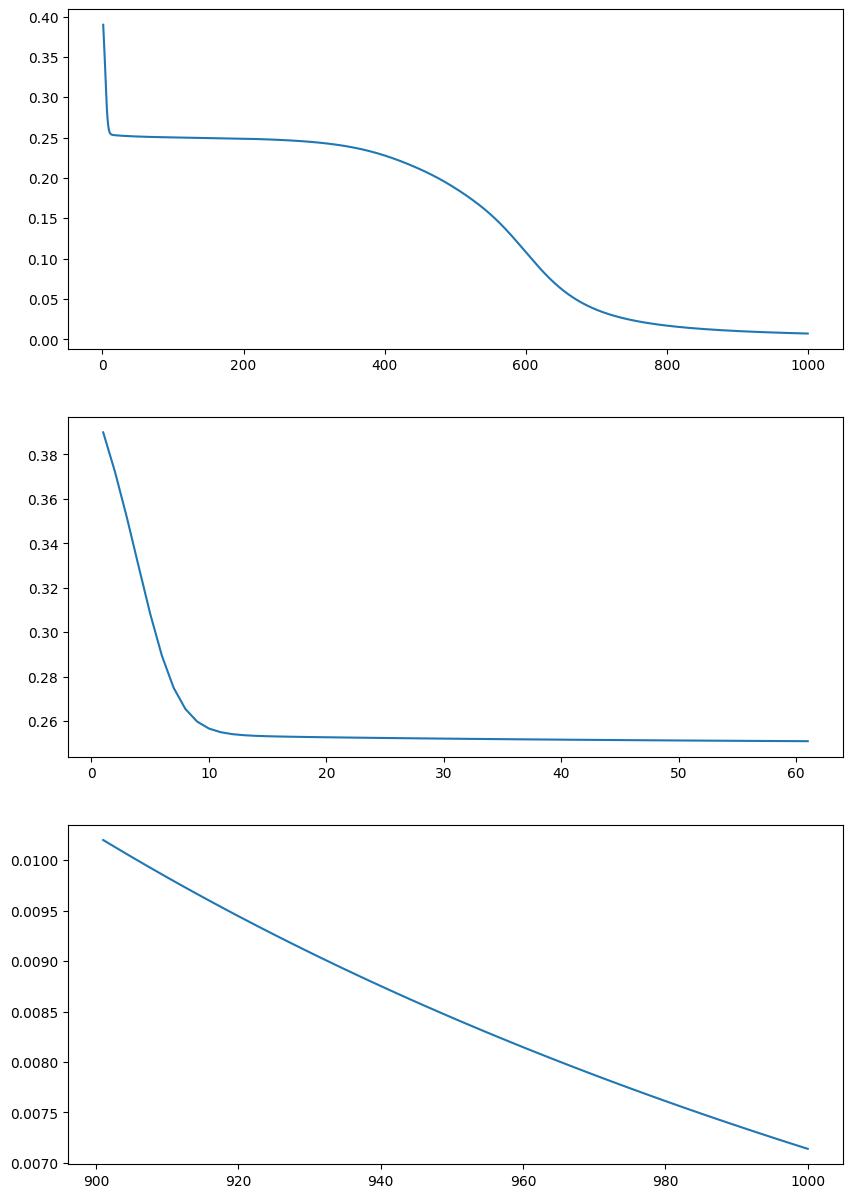

In [7]:
mlp = MLP(2, 2, 1)
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
outputs = np.array([0,1,1,0])
xs = inputs.T

print(mlp.feedforward(xs))

epochs = 1000
c = mlp.train(epochs, 3.0, inputs, outputs)

print(mlp.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])

### Testing with 3 input neurons, 3 hidden neurons and 1 output neuron

Before Training:
 [[0.19785096 0.24598301 0.24974162 0.28856868 0.21846881 0.27047313
  0.2726467  0.30741896]]

After Training:
 [[0.11374244 0.85434302 0.90495547 0.15994027 0.8486562  0.10031443
  0.15148769 0.89813673]]


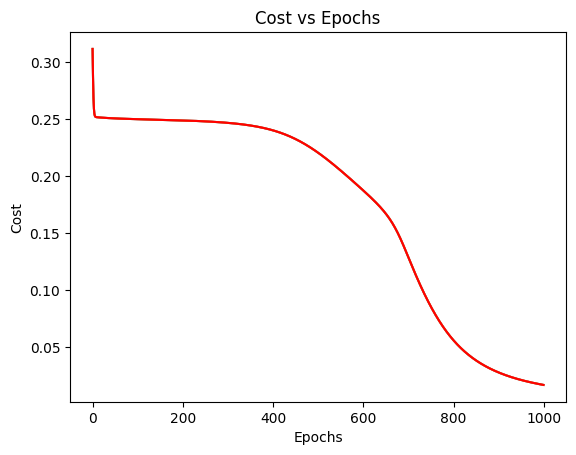

In [8]:
mlp = MLP(3, 3, 1)
inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0 ,1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1 ,1, 1]])
outputs = np.array([0, 1, 1, 0, 1, 0, 0, 1])
xs = inputs.T

print("Before Training:\n", mlp.feedforward(xs))

epochs = 1000
eta = 3.0 
cst = mlp.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", mlp.feedforward(xs))
eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="red")

# Parameterised MLP

### Problem 1

Before Training:
 [[0.4321933  0.52195082 0.43163385 0.51250656]]

After Training:
 [[0.23778898 0.73732978 0.52921682 0.50609622]]


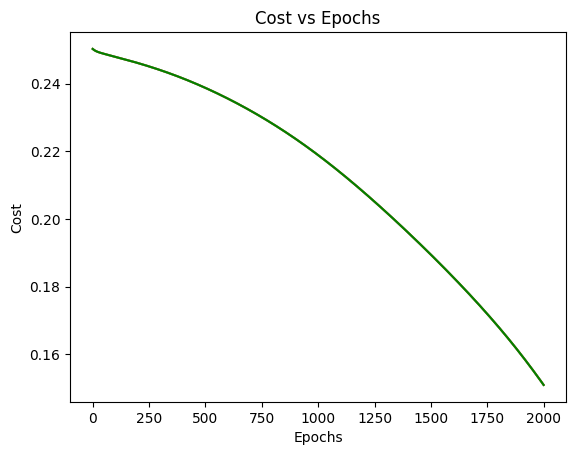

In [9]:
inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1 ,1, 1]])
outputs = np.array([0, 1, 1, 0])

prob_1 = MLP(3, 4, 1)
xs = inputs.T

print("Before Training:\n", prob_1.feedforward(xs))
epochs = 2000
eta = 0.3
cst = prob_1.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", prob_1.feedforward(xs))
eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="green")

A learning rate of 0.3 is far too low, and the NN does not reach an optimal solution within 2000 epochs. A learning rate around 3.0 is far more suitable.

Before Training:
 [[0.4321933  0.52195082 0.43163385 0.51250656]]

After Training:
 [[0.01677344 0.96654845 0.96738055 0.04219606]]


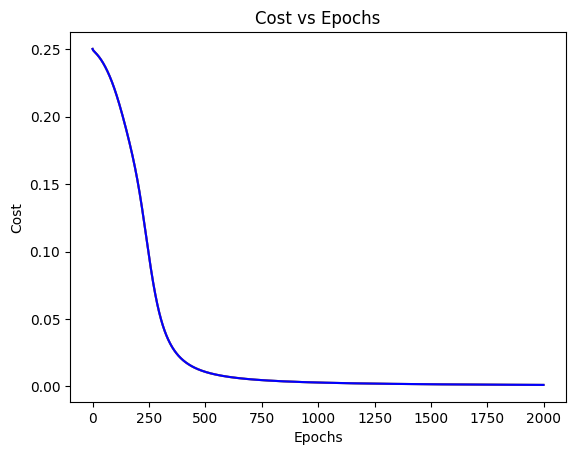

In [10]:
inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1 ,1, 1]])
outputs = np.array([0, 1, 1, 0])

prob_1 = MLP(3, 4, 1)
xs = inputs.T

print("Before Training:\n", prob_1.feedforward(xs))
epochs = 2000
eta = 3.0
cst = prob_1.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", prob_1.feedforward(xs))
eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="blue")

A higher learning rate of 3.0 is much preferable as the NN can produce far more accurate results in fewer epochs. What causes the learning to become unstable?

Before Training:
 [[0.4321933  0.52195082 0.43163385 0.51250656]]

After Training:
 [[0.00518873 0.76787766 0.99919043 0.76781935]]


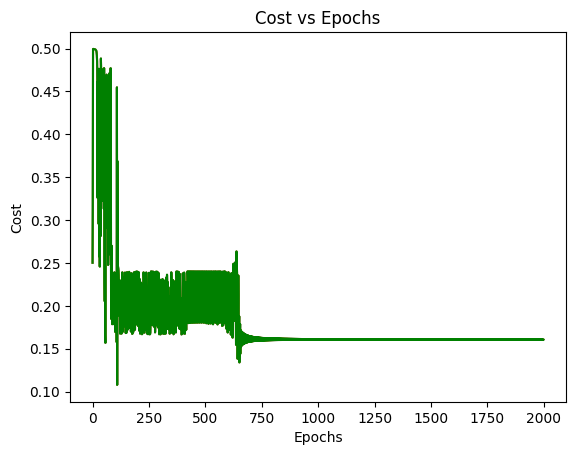

In [11]:
inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1 ,1, 1]])
outputs = np.array([0, 1, 1, 0])

prob_1 = MLP(3, 4, 1)
xs = inputs.T

print("Before Training:\n", prob_1.feedforward(xs))
epochs = 2000
eta = 100.0
cst = prob_1.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", prob_1.feedforward(xs))
eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="green")

### Problem 2

### 3 hidden neurons, 2000 epochs, 0.3 learning rate

Before Training:
 [[0.14 0.08 0.14 0.08 0.1  0.08 0.16]
 [0.23 0.37 0.22 0.33 0.33 0.36 0.19]]

After Training:
[[0.95 0.38 0.93 0.94 0.96 0.63 0.9 ]
 [0.42 0.88 0.65 0.31 0.24 0.71 0.68]]


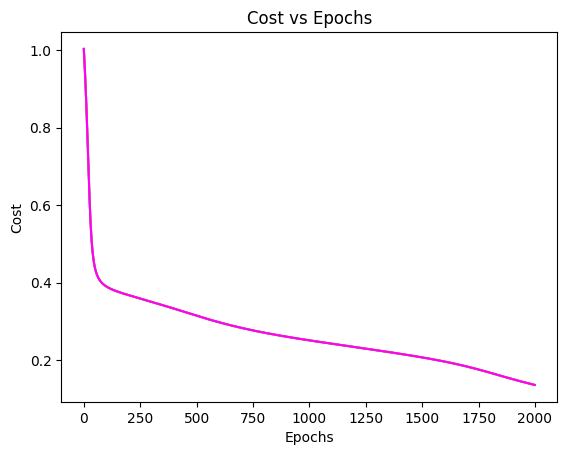

In [12]:
x_training = np.array([[1, 1, 0],
                       [1, -1, -1],
                       [-1, 1, 1],
                       [-1, -1, 1],
                       [0, 1, -1],
                       [0, -1, -1],
                       [1, 1, 1]])

y_training = np.array([[1, 0],
                       [0, 1],
                       [1, 1,],
                       [1, 0],
                       [1, 0],
                       [1, 1],
                       [1, 1]])

prob_2 = MLP(3, 3, 2)
xs = x_training.T

print("Before Training:\n", np.round(prob_2.feedforward(xs), 2))

epochs = 2000
eta = 0.3
cst = prob_2.train(epochs, eta, x_training, y_training)

print("\nAfter Training:")
print(np.round(prob_2.feedforward(xs), 2))

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="magenta")

### 3 hidden neurons, 2000 epochs, 3.0 learning rate

Before Training:
 [[0.14 0.08 0.14 0.08 0.1  0.08 0.16]
 [0.23 0.37 0.22 0.33 0.33 0.36 0.19]]

After Training:
[[1.   0.09 0.99 1.   1.   0.91 0.99]
 [0.07 1.   0.98 0.05 0.03 0.92 0.96]]


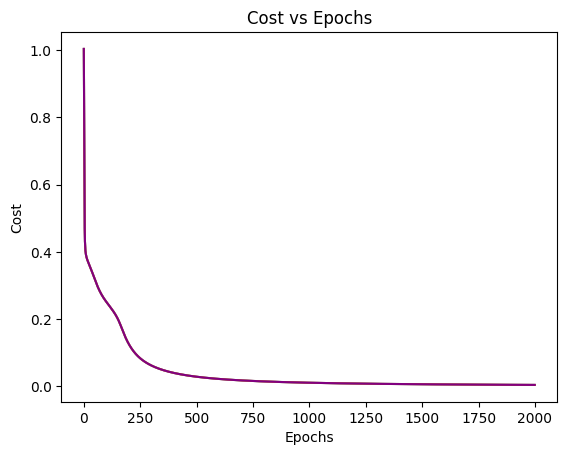

In [13]:
x_training = np.array([[1, 1, 0],
                       [1, -1, -1],
                       [-1, 1, 1],
                       [-1, -1, 1],
                       [0, 1, -1],
                       [0, -1, -1],
                       [1, 1, 1]])

y_training = np.array([[1, 0],
                       [0, 1],
                       [1, 1,],
                       [1, 0],
                       [1, 0],
                       [1, 1],
                       [1, 1]])

prob_2 = MLP(3, 3, 2)
xs = x_training.T

print("Before Training:\n", np.round(prob_2.feedforward(xs), 2))

epochs = 2000
eta = 3.0
cst = prob_2.train(epochs, eta, x_training, y_training)

print("\nAfter Training:")
print(np.round(prob_2.feedforward(xs), 2))

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="purple")

### 5 hidden neurons, 2000 epochs, 3.0 learning rate

Before Training:
 [[0.95 0.96 0.87 0.88 0.95 0.94 0.94]
 [0.52 0.58 0.64 0.78 0.56 0.64 0.55]]

After Training:
[[0.98 0.04 1.   0.99 0.99 0.97 0.98]
 [0.03 0.99 0.97 0.05 0.01 0.98 0.97]]


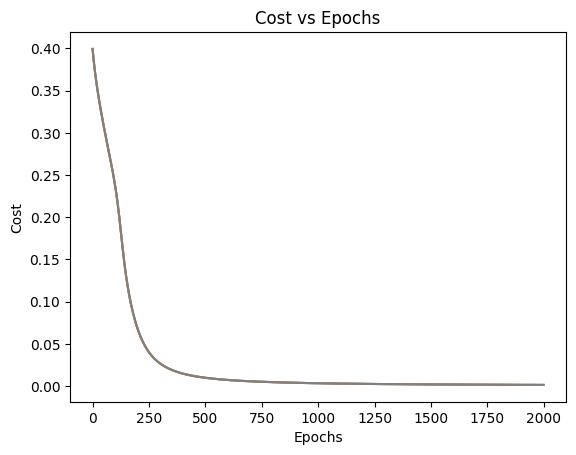

In [14]:
x_training = np.array([[1, 1, 0],
                       [1, -1, -1],
                       [-1, 1, 1],
                       [-1, -1, 1],
                       [0, 1, -1],
                       [0, -1, -1],
                       [1, 1, 1]])

y_training = np.array([[1, 0],
                       [0, 1],
                       [1, 1,],
                       [1, 0],
                       [1, 0],
                       [1, 1],
                       [1, 1]])

prob_2 = MLP(3, 5, 2)
xs = x_training.T

print("Before Training:\n", np.round(prob_2.feedforward(xs), 2))

epochs = 2000
eta = 3.0
cst = prob_2.train(epochs, eta, x_training, y_training)

print("\nAfter Training:")
print(np.round(prob_2.feedforward(xs), 2))

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="grey")

# Problem 3 - Transportation

This problem has a more complex dataset. I used a custom mapping to ensure the data could be understood more easily.

This means I mapped all values in the dataframe to integer values so they can be interpreted by the MLP.

Instead of having one column for the transportation mode, I created three columns; one for each transport method. These columns contain binary values - and so in a given row, if the transport method is Bus, the Bus column will have a value of 1, while the others will have a value of 0.

The original 'Transportation Mode' column is then dropped.

The MLP is then set to have three output neurons, in order to indictate which transport method is predicted. Using the three output neurons, the index of the neuron with the highest value (found using the `argmax()` function) is returned. This is then interpreted to find which transport method should be used.

In [15]:
transport_df = pd.DataFrame({
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Car Ownership': [0, 1, 1, 0, 1, 0, 1, 1, 2, 2],
    'Travel Cost': ['Cheap', 'Cheap', 'Cheap', 'Cheap', 'Cheap', 'Standard', 'Standard', 'Expensive', 'Expensive', 'Expensive'],
    'Income Level': ['Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High'],
    'Transportation Mode': ['Bus', 'Bus', 'Train', 'Bus', 'Bus', 'Train', 'Train', 'Car', 'Car', 'Car']
})

custom_mapping = {
    'Male': 0,
    'Female': 1,
    'Cheap': 0,
    'Standard': 1,
    'Expensive': 2,
    'Low': 0,
    'Medium': 1,
    'High': 2
}

cols_to_map = ['Gender', 'Travel Cost', 'Income Level']

for col in cols_to_map:
    transport_df[col] = transport_df[col].map(custom_mapping)

# Use pd.get_dummies to create binary columns for each transportation mode
transportation_modes = pd.get_dummies(transport_df['Transportation Mode']).astype(int)

# Concatenate the new columns with the original DataFrame
transport_df = pd.concat([transport_df, transportation_modes], axis=1)

# Drop the original 'Transportation Mode' column
transport_df.drop('Transportation Mode', axis=1, inplace=True)

transport_df.to_csv('transport_data.csv', index=False)

transport_df.head()

,Gender,Car Ownership,Travel Cost,Income Level,Bus,Car,Train
0,0,0,0,0,1,0,0
1,0,1,0,1,1,0,0
2,1,1,0,1,0,0,1
3,1,0,0,0,1,0,0
4,0,1,0,1,1,0,0


Before Training:
 [[0.54 0.6  0.51 0.48 0.6  0.52 0.5  0.51 0.7  0.6 ]
 [0.07 0.07 0.05 0.05 0.07 0.09 0.07 0.07 0.12 0.07]
 [0.72 0.8  0.79 0.74 0.8  0.71 0.75 0.76 0.75 0.8 ]]

After Training:
[[1.   0.98 0.04 0.95 0.98 0.03 0.02 0.01 0.02 0.01]
 [0.   0.   0.01 0.   0.   0.03 0.04 0.96 0.97 0.97]
 [0.   0.02 0.95 0.05 0.02 0.95 0.96 0.05 0.02 0.03]] 

Prediction: Bus
Prediction: Bus
Prediction: Train
Prediction: Bus
Prediction: Bus
Prediction: Train
Prediction: Train
Prediction: Car
Prediction: Car
Prediction: Car


Prediction: Train


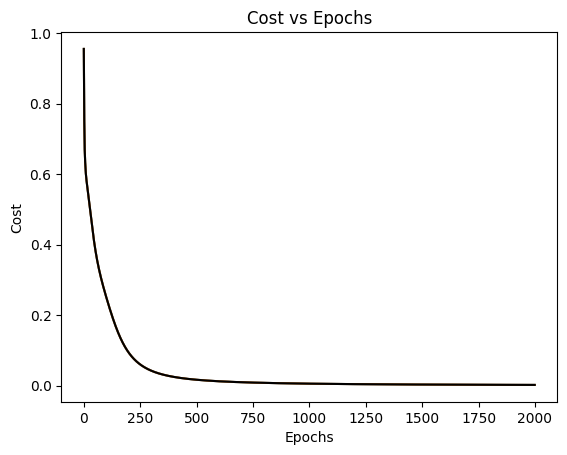

In [16]:
inputs = transport_df.iloc[:, :-3].values
outputs = transport_df.iloc[:, -3:].values

prob_3 = MLP(inputs.shape[1], 3, outputs.shape[1])
xs = inputs.T

print("Before Training:\n", np.round(prob_3.feedforward(xs), 2))

epochs = 2000
eta = 3.0
cst = prob_3.train(epochs, eta, inputs, outputs)

print("\nAfter Training:")
print(np.round(prob_3.feedforward(xs), 2), '\n')

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="black")

for x in inputs:
    prediction = prob_3.predict(x)
    if prediction == 0:
        print("Prediction: Bus")
    elif prediction == 1:
        print("Prediction: Car")
    elif prediction == 2:
        print("Prediction: Train")

test_prediction = np.array([custom_mapping['Female'], 0, custom_mapping['Expensive'], custom_mapping['Medium']])
prediction = prob_3.predict(test_prediction)
if prediction == 0:
    print("\n\nPrediction: Bus")
elif prediction == 1:
    print("\n\nPrediction: Car")
elif prediction == 2:
    print("\n\nPrediction: Train")

In [17]:
inputs.shape[1], outputs.shape[1]

(4, 3)

# Problem 4 - Iris Dataset

The dataframe for the Iris dataset uses a similar structure to the Transportation dataset. The CSV is read into a dataframe, using the column names specified in the PDF. 

Similarly to the Transportation dataset, I turned the 'Class' column into three separate columns for Iris Setosa, Iris Versicolor and Iris Virginica. 

This allows me to make predictions using 3 output neurons.

In [18]:
data_iris = pd.read_csv('iris_data.csv', names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
iris_types = pd.get_dummies(data_iris['Class']).astype(int)

data_iris = pd.concat([data_iris, iris_types], axis=1)
data_iris.drop('Class', axis=1, inplace=True)

data_iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [19]:
def test_prediction(prediction):
    if prediction == 0:
        print("Prediction: Iris Setosa")
    elif prediction == 1:
        print("Prediction: Iris Versicolor")
    elif prediction == 2:
        print("Prediction: Iris Virginica")

I didn't print the return values from feedforward(xs) here, as that would print out 150 rows of data.

Prediction: Iris Setosa
Prediction: Iris Versicolor
Prediction: Iris Virginica


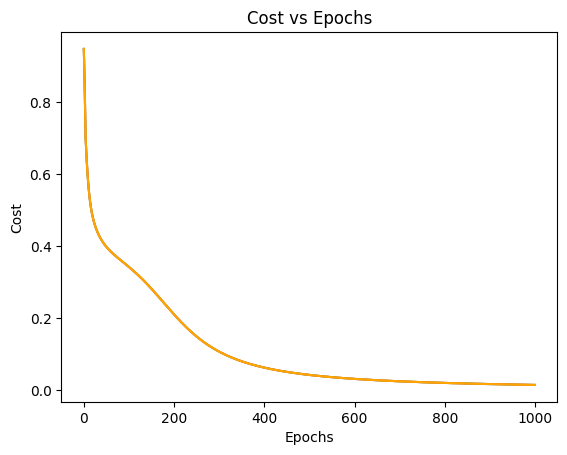

In [20]:
inputs = data_iris.iloc[:, :-1].values
outputs = data_iris.iloc[:, -3:].values

prob_4 = MLP(inputs.shape[1], 4, outputs.shape[1])
xs = inputs.T

prob_4.feedforward(xs)

epochs = 1000
eta = 1.0
cst = prob_4.train(epochs, eta, inputs, outputs)

prob_4.feedforward(xs)

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="orange")

prediction = prob_4.predict(inputs[0]) # should return Iris Setosa
test_prediction(prediction)

prediction = prob_4.predict(inputs[87]) # should return Iris Versicolor
test_prediction(prediction)

prediction = prob_4.predict(inputs[-1]) # should return Iris Virginica
test_prediction(prediction)

# Problem 5 - Car Evaluation

This dataset [linked here](https://archive.ics.uci.edu/dataset/19/car+evaluation) evaluates cars based on:

- buying: Buying price (low, med, high, vhigh)
- maint: Price of the maintenance (low, med, high, vhigh)
- doors: Number of doors (2, 3, 4, 5more)
- persons: Amount of people the car can carry including driver (2, 4, more)
- lug_boot: Size of the luggage boot (small, med, big)
- safety: Estimated crash safety of the car (low, med, high)
- class: Evaluation level (unacc, acc, good, vgood)

All values have had their string values mapped to integer values as per the mapping below, similarly to what was done for previous datasets.

Likewise, 'class' has been separated into four separate columns, and 'class' has been dropped.

For training purposes, I've changed the data so any row where the value '5more' in the 'doors' column is replaced with the number 5.
Likewise, the value 'more' in the 'persons' column has been replaced with the number 5.

In [21]:
car_df = pd.read_csv('car_data.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

custom_mapping = {
    'low': 0,
    'med': 1,
    'high': 2,
    'vhigh': 3,
    'small': 0,
    'big': 2
}

cols_to_map = ['buying', 'maint', 'lug_boot', 'safety']
for col in cols_to_map:
    car_df[col] = car_df[col].map(custom_mapping)

car_df['doors'] = car_df['doors'].replace('5more', 5)
car_df['persons'] = car_df['persons'].replace('more', 5)

car_classes = pd.get_dummies(car_df['class']).astype(int)

car_df = pd.concat([car_df, car_classes], axis=1)
car_df.drop('class', axis=1, inplace=True)

car_df = car_df.astype(int)

car_df.head()

,buying,maint,doors,persons,lug_boot,safety,acc,good,unacc,vgood
0,3,3,2,2,0,0,0,0,1,0
1,3,3,2,2,0,1,0,0,1,0
2,3,3,2,2,0,2,0,0,1,0
3,3,3,2,2,1,0,0,0,1,0
4,3,3,2,2,1,1,0,0,1,0


I'm taking the last 50 rows from car_df, as the dataset contains 1728 rows. A full execution of the code below on 1728 rows would take around 3 minutes on my laptop.

In [22]:
car_df_trim = car_df.tail(50)
car_df_trim.head(7)

,buying,maint,doors,persons,lug_boot,safety,acc,good,unacc,vgood
1678,0,0,4,2,1,1,0,0,1,0
1679,0,0,4,2,1,2,0,0,1,0
1680,0,0,4,2,2,0,0,0,1,0
1681,0,0,4,2,2,1,0,0,1,0
1682,0,0,4,2,2,2,0,0,1,0
1683,0,0,4,4,0,0,0,0,1,0
1684,0,0,4,4,0,1,1,0,0,0


In [23]:
def test_prediction(prediction):
    if prediction == 0:
        print("Prediction: Acceptable")
    elif prediction == 1:
        print("Prediction: Good")
    elif prediction == 2:
        print("Prediction: Unacceptable")
    elif prediction == 3:
        print("Prediction: Very Good")

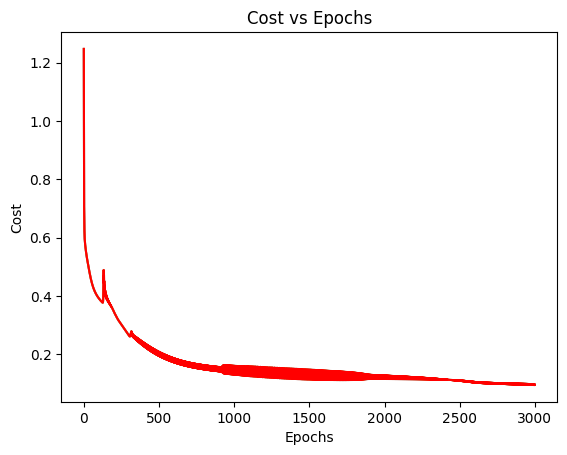

Prediction: Unacceptable
Prediction: Acceptable
Prediction: Very Good


In [24]:
inputs = car_df_trim.iloc[:, :-4].values
outputs = car_df_trim.iloc[:, -4:].values

prob_5 = MLP(inputs.shape[1], 4, outputs.shape[1])
xs = inputs.T

prob_5.feedforward(xs)

epochs = 3000
eta = 3.0
cst = prob_5.train(epochs, eta, inputs, outputs)

prob_5.feedforward(xs)

eps = [e for e in range(epochs)]

plt.plot(eps, cst)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(eps, cst, color="red")
plt.show()

prediction = prob_5.predict(inputs[0]) # should return unacceptable 
test_prediction(prediction)

prediction = prob_5.predict(inputs[6]) # should return acceptable
test_prediction(prediction)

prediction = prob_5.predict(inputs[-1]) # should return vgood
test_prediction(prediction)

# Cross-Entropy Cost Tests

In [25]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurons
# You must complete this code yourself
class CrossEntropyMLP:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n 
        self.o = o
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n, m)
        self.b2 = np.random.randn(n, 1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o, n)
        self.b3 = np.random.randn(o, 1)
        
    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):       
            # if these are not reshaped to size (m,1) and (o,1) respectively, they will be of shape
            # (m,) and (o,), which can cause problems.
            x = x.reshape(-1, 1)
            y = y.reshape(-1, 1)
            
            a1 = x          # convert input vector x into (m,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (m,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3) # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
           
           # changed from previous MLP to use cross-entropy cost function
            cost += -np.sum(y * np.log(a3) + (1 - y) * np.log(1 - a3))
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta, xs, ys):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
    
    def predict(self, x):
        x = x.reshape(self.m, 1)
        a3 = self.feedforward(x)
        
        # Get the index of the maximum probability as the predicted class
        prediction = np.argmax(a3) # Add 1 because classes start from 1
        return prediction

### Comparison with 3 input neurons, 3 hidden neurons and 1 output neuron

In [26]:
inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0 ,1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1 ,1, 1]])
outputs = np.array([0, 1, 1, 0, 1, 0, 0, 1])
xs = inputs.T
epochs = 1000
eta = 10

Before Training:
 [[0.19785096 0.24598301 0.24974162 0.28856868 0.21846881 0.27047313
  0.2726467  0.30741896]]

After Training:
 [[0.02750184 0.9631063  0.97449857 0.04268599 0.9604497  0.02872821
  0.03881281 0.97313624]]


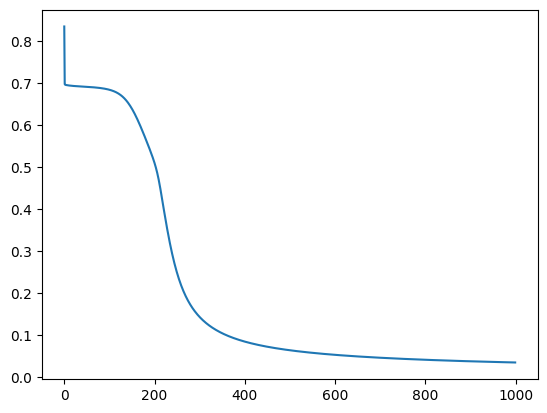

In [27]:
ce_mlp = CrossEntropyMLP(3, 3, 1)
print("Before Training:\n", ce_mlp.feedforward(xs))
cst_ce = ce_mlp.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", ce_mlp.feedforward(xs))
eps_ce = [e for e in range(epochs)]

Before Training:
 [[0.19785096 0.24598301 0.24974162 0.28856868 0.21846881 0.27047313
  0.2726467  0.30741896]]

After Training:
 [[0.02750184 0.9631063  0.97449857 0.04268599 0.9604497  0.02872821
  0.03881281 0.97313624]]


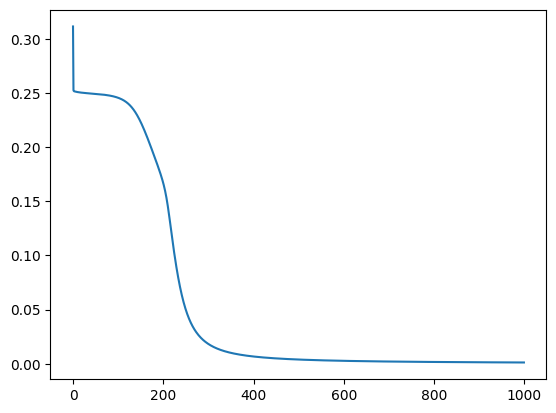

In [28]:
mlp = MLP(3, 3, 1)
print("Before Training:\n", mlp.feedforward(xs))
cst_mse = mlp.train(epochs, eta, inputs, outputs)
print("\nAfter Training:\n", mlp.feedforward(xs))
eps_mse = [e for e in range(epochs)]

Using the dataset above, Cross-Entropy cost takes around the same time to converge as MSE. The cost remains higher with Cross-Entropy.

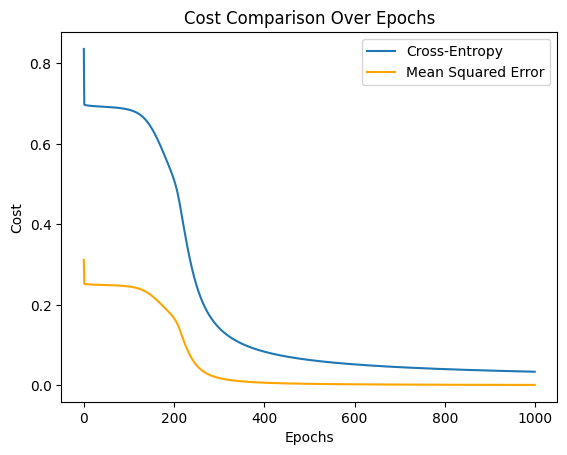

In [29]:
# Plot Cross-Entropy
plt.plot(eps_ce, cst_ce, label='Cross-Entropy')
# Plot Mean Squared Error in the same graph
plt.plot(eps_mse, cst_mse, label='Mean Squared Error', color='orange')

plt.title('Cost Comparison Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()

### Testing with Car Evaluation Data

In [30]:
inputs = car_df_trim.iloc[:, :-4].values
outputs = car_df_trim.iloc[:, -4:].values
xs = inputs.T
epochs = 3000
eta = 3.0

Prediction: Unacceptable
Prediction: Acceptable
Prediction: Very Good


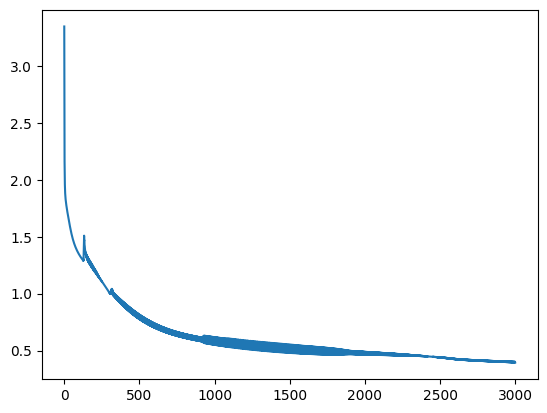

In [31]:
ce_mlp = CrossEntropyMLP(inputs.shape[1], 4, outputs.shape[1])
ce_mlp.feedforward(xs)
cst_ce = ce_mlp.train(epochs, eta, inputs, outputs)
ce_mlp.feedforward(xs)
eps_ce = [e for e in range(epochs)]

prediction = ce_mlp.predict(inputs[0]) # should return unacceptable 
test_prediction(prediction)

prediction = ce_mlp.predict(inputs[6]) # should return acceptable
test_prediction(prediction)

prediction = ce_mlp.predict(inputs[-1]) # should return vgood
test_prediction(prediction)

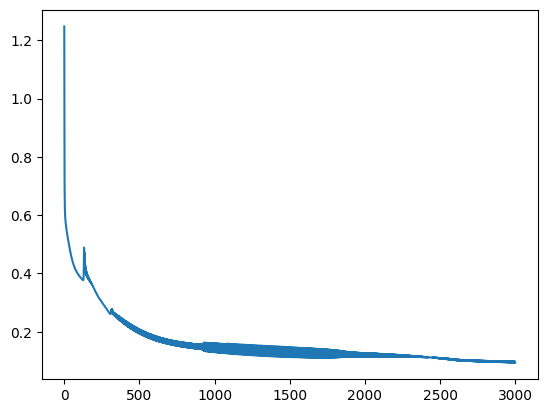

In [32]:
mlp = MLP(inputs.shape[1], 4, outputs.shape[1])
mlp.feedforward(xs)
cst_mse = mlp.train(epochs, eta, inputs, outputs)
mlp.feedforward(xs)
eps_mse = [e for e in range(epochs)]

As with the previous example, Cross-Entropy cost takes around the same time to converge as MSE. The cost remains higher with Cross-Entropy.

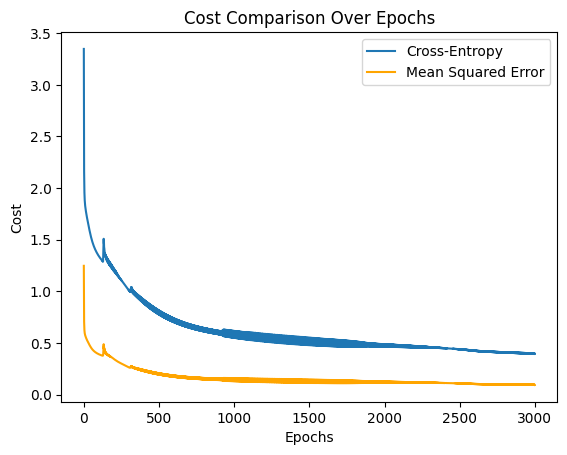

In [33]:
# Plot Cross-Entropy
plt.plot(eps_ce, cst_ce, label='Cross-Entropy')
# Plot Mean Squared Error in the same graph
plt.plot(eps_mse, cst_mse, label='Mean Squared Error', color='orange')

plt.title('Cost Comparison Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()